In [265]:
import OPPs
import OrbitRepresentatives as ORs
# import OrbitRepresentatives_Recursion as ORs
import math
import timeit
import matplotlib.pyplot as plt

In [266]:
alist = [[1, 2], [0, 2], [0, 1, 3, 4], [2], [2]]
Gorb = OPPs.Graph(alist)
pi = [[0, 1], [2], [3, 4]]

In [267]:
Reps, tests, successes = ORs.OrbitRepresentatives(Gorb, pi, True)

Computing Orbit Representatives

^^^^^^^^^^^^^^^^^^^^
i=1 infected nodes

_____________________
States:
[0, 1, 0, 0, 0]
[1, 0, 0, 0, 0]
Partitions from states:
[[0], [2], [3, 4], [1]]
[[1], [2], [3, 4], [0]]
Starting mapping...

*******************

Level 0, OPP:
[0 | 2 | 3, 4 | 1]
[1 | 2 | 3, 4 | 0]

Level 0. Mapping top vertex 3 to bottom vertex 3 in cell 2
Split OPP:
[0 | 2 | 4 | 3 | 1]
[1 | 2 | 4 | 3 | 0]

Found automorphism
[0 | 2 | 4 | 3 | 1]
[1 | 2 | 4 | 3 | 0]
Permutation:
[1, 0, 2, 3, 4]

_____________________
States:
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
Partitions from states:
[[0, 1], [3, 4], [2]]
[[1], [2], [3, 4], [0]]
Starting mapping...

Refinement not equitable
Permutation:
None

_____________________
States:
[0, 0, 0, 1, 0]
[1, 0, 0, 0, 0]
Partitions from states:
[[0, 1], [2], [4], [3]]
[[1], [2], [3, 4], [0]]
Starting mapping...

Refinement not equitable
Permutation:
None

_____________________
States:
[0, 0, 0, 1, 0]
[0, 0, 1, 0, 0]
Partitions from states:
[[0, 1], [2], [

In [268]:
Reps

[[0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 1, 1, 1],
 [1, 1, 0, 1, 1],
 [1, 1, 1, 0, 1],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 1, 1, 1],
 [0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [1, 1, 0, 0, 1],
 [1, 1, 1, 0, 0]]

In [269]:
%timeit ORs.OrbitRepresentatives(Gorb,pi,False)

1.16 ms ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [270]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)

    return wrapped

In [271]:
# times = []
# tests = []
# successes = []
# sizes = range(3, 36)
# for N in sizes:
#     alist = [[0] for x in range(N)]
#     alist[0] = [i for i in range(1, N)]
#     Gstar = OPPs.Graph(alist)
#     pi = [[0], [i for i in range(1, N)]]
#     wrapped = wrapper(ORs.OrbitRepresentatives, Gstar, pi, False)
#     t = timeit.timeit(wrapped, number=1)
#     times.append(t)
#     Reps, Ntests, Nsuccesses = ORs.OrbitRepresentatives(Gstar, pi, False)
#     tests.append(sum(Ntests))
#     successes.append(sum(Nsuccesses))
#     print(
#         "N={}, |S/G|={}, tests={}, successes={}, t={}".format(
#             N, len(Reps), sum(Ntests), sum(Nsuccesses), t
#         )
#     )

In [272]:
# print(sizes)
# print(times)
# print(tests)
# print(successes)

In [273]:
# Non-recursive
sizes = range(3, 36)
times = [7.51999905332923e-05, 0.0004414001014083624, 0.001173500088043511, 0.004824000061489642, 0.008822000003419816, 0.01897670002654195, 0.041853400063700974, 0.06690889992751181, 0.10684410005342215, 0.16926280001644045, 0.3288569999858737, 0.5684589999727905, 0.9494210999691859, 1.1723066000267863, 1.5277602000860497, 2.07427939993795, 2.1817447999492288, 3.3480284999823198, 3.535692699952051, 3.924910999950953, 4.176171300001442, 5.3261491999728605, 6.500476300017908, 8.05607220006641, 9.929250300046988, 12.72761589998845, 14.925033199950121, 18.37787520000711, 20.397804900072515, 24.661641699960455, 27.446315399953164, 33.16028399998322, 36.42082650004886]
tests = [3, 10, 15, 28, 36, 55, 66, 91, 105, 136, 153, 190, 210, 253, 276, 325, 351, 406, 435, 496, 528, 595, 630, 703, 741, 820, 861, 946, 990, 1081, 1128, 1225, 1275]
successes = [1, 5, 8, 16, 21, 33, 40, 56, 65, 85, 96, 120, 133, 161, 176, 208, 225, 261, 280, 320, 341, 385, 408, 456, 481, 533, 560, 616, 645, 705, 736, 800, 833]

In [274]:
# Recursive
sizesR = range(3, 36)
timesR = [7.51999905332923e-05, 0.0004414001014083624, 0.001173500088043511, 0.004824000061489642, 0.008822000003419816, 0.01897670002654195, 0.041853400063700974, 0.06690889992751181, 0.10684410005342215, 0.16926280001644045, 0.3288569999858737, 0.5684589999727905, 0.9494210999691859, 1.1723066000267863, 1.5277602000860497, 2.07427939993795, 2.1817447999492288, 3.3480284999823198, 3.535692699952051, 3.924910999950953, 4.176171300001442, 5.3261491999728605, 6.500476300017908, 8.05607220006641, 9.929250300046988, 12.72761589998845, 14.925033199950121, 18.37787520000711, 20.397804900072515, 24.661641699960455, 27.446315399953164, 33.16028399998322, 36.42082650004886]
testsR = [3, 10, 15, 28, 36, 55, 66, 91, 105, 136, 153, 190, 210, 253, 276, 325, 351, 406, 435, 496, 528, 595, 630, 703, 741, 820, 861, 946, 990, 1081, 1128, 1225, 1275]
successesR = [1, 5, 8, 16, 21, 33, 40, 56, 65, 85, 96, 120, 133, 161, 176, 208, 225, 261, 280, 320, 341, 385, 408, 456, 481, 533, 560, 616, 645, 705, 736, 800, 833]

Text(0, 0.5, 'Time (s)')

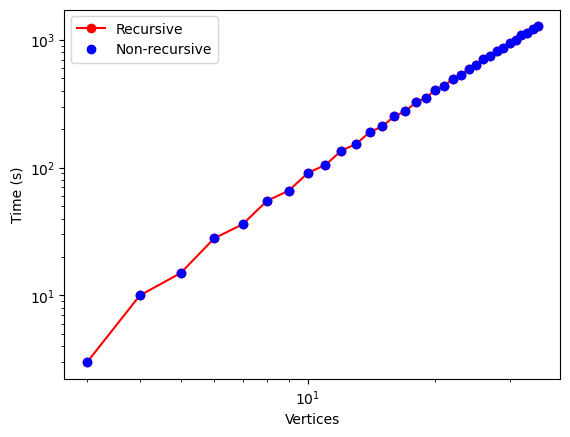

In [275]:
%matplotlib inline
plt.loglog(sizesR, testsR, "ro-", label="Recursive")
plt.loglog(sizes, tests, "bo", label="Non-recursive")
plt.legend(loc="upper left")

plt.xlabel("Vertices")
plt.ylabel("Time (s)")

In [276]:
(math.log(times[-1]) - math.log(times[1])) / (math.log(sizes[-1]) - math.log(sizes[1]))

5.219188257113583

Profiling
=====


Start by profiling a simple graph, Gorb.

Gorb
---

In [277]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [278]:
%lprun -f ORs.OrbitRepresentatives ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.0073938 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OrbitRepresentatives.py
Function: OrbitRepresentatives at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           def OrbitRepresentatives(G, pi, *args):
    21                                               """
    22                                               Arguments:
    23                                               graph G
    24                                               vertex partition pi
    25                                               *args - currently only expecting logical verbose
    26                                               """
    27                                           
    28                                               # set verbose variable, default is True
    29         1         10.0     10.0      0.0      if len(args) > 0:
    30         1          5.0      5.0      0.0          

98% of the time in GetAutomorphism

In [279]:
%lprun -f ORs.Automorphisms.GetAutomorphism ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.008022 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\Automorphisms.py
Function: GetAutomorphism at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def GetAutomorphism(Si, Sj, G, pi, *args):
     4                                               """
     5                                               Test for automorphism between (binary) states Si and Sj with graph G.
     6                                               Partition pi is orbit partition of vertices.
     7                                               Assume that vertices are labelled 0 to N-1 in G.
     8                                               """
     9                                           
    10                                               # Set verbosity based on arguments (default to True)
    11        29        109.0      3.8      0.1      if len(args) > 0:
    12        29         77.0   

In GetAutomorphisms, 67% of the time making the OPP, 23.8% in mapping.

In [280]:
%lprun -f ORs.Automorphisms.mapping ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.0025243 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\Automorphisms.py
Function: mapping at line 149

Line #      Hits         Time  Per Hit   % Time  Line Contents
   149                                           def mapping(opp, verbose):
   150                                           
   151        29         96.0      3.3      0.4      if verbose:
   152                                                   print("Starting mapping...")
   153                                           
   154                                               # Initial checking
   155        29         83.0      2.9      0.3      if not opp.IsRefined:
   156                                                   opp.refine()
   157                                                   if verbose:
   158                                                       print("\nNeeds refining. Get:")
   159                                                       print(opp)
   160         

37.6% of the time in mapping is spent making a new OPP, 49.5% of the time is spent in split.

In [281]:
# %lprun -f ORs.OPPs.GetPermutation ORs.OrbitRepresentatives(Gorb,pi,False)
%lprun -f OPPs.GetPermutation ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 4.77e-05 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: GetPermutation at line 194

Line #      Hits         Time  Per Hit   % Time  Line Contents
   194                                           def GetPermutation(OPP):
   195                                               # Gets permutation from a Unit OPP
   196                                               # Assumes that vertices are labelled 0 to N-1
   197         6         37.0      6.2      7.8      if OPP.IsUnit:
   198         6         40.0      6.7      8.4          p = [-1] * OPP.numberofelements
   199        36        156.0      4.3     32.7          for i in range(OPP.t.numberofcells):
   200        30        201.0      6.7     42.1              p[OPP.t.pi[i][0]] = OPP.b.pi[i][0]
   201         6         27.0      4.5      5.7          if -1 in p:
   202                                                       print("Ordered Partition Pair not formatted correctly:")
 

Wondering if this is different to the call above?
31.8% in the (?) loop and 43.2% in permutation?

In [282]:
%lprun -f OPPs.OrderedPartitionPair.__init__ ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.0052109 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: __init__ at line 139

Line #      Hits         Time  Per Hit   % Time  Line Contents
   139                                               def __init__(self, pit, pib, G):
   140                                                   # Ensures that this instance doesn't affect lists (of lists) pit and pib.
   141        33      26774.0    811.3     51.4          self.t = Partition([[x for x in cell] for cell in pit], G)
   142        33      24614.0    745.9     47.2          self.b = Partition([[x for x in cell] for cell in pib], G)
   143        33         71.0      2.2      0.1          self.G = G
   144                                                   # self.numberofcells=[len(pit),len(pib)]
   145                                                   # self.cellsizes=[[len(x) for x in pit],[len(x) for x in pib]]
   146        33         97.0      2.9      0.2          if self.t

Most of the (98.6%) time making OPPs is spent making the partitions.

In [283]:
%lprun -f ORs.Automorphisms.OPPs.Partition.__init__ ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.0052501 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: __init__ at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                               def __init__(self, pi, G):
    21        66        160.0      2.4      0.3          self.pi = pi
    22        66        149.0      2.3      0.3          self.G = G
    23        66        189.0      2.9      0.4          self.numberofcells = len(pi)
    24        66       1155.0     17.5      2.2          self.cellsizes = [len(x) for x in pi]
    25        66        402.0      6.1      0.8          self.numberofelements = sum(self.cellsizes)
    26        66        147.0      2.2      0.3          self.IsRefined = None  # getcelldegrees() replaces this
    27        66      49951.0    756.8     95.1          self.celldegrees = self.getcelldegrees()
    28        66        197.0      3.0      0.4          if self.numberofcells == self.numb

Most of the time (95%) making partitions is spent getting cell degrees

In [284]:
%lprun -f ORs.Automorphisms.OPPs.Partition.getcelldegrees ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.0058645 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: getcelldegrees at line 46

Line #      Hits         Time  Per Hit   % Time  Line Contents
    46                                               def getcelldegrees(self):
    47                                                   """Compute degrees of each cell to each other cell"""
    48        74        152.0      2.1      0.3          self.IsRefined = True  # Only updates if false
    49        74        136.0      1.8      0.2          degrees = []
    50       376        681.0      1.8      1.2          for cell in self.pi:
    51       302        638.0      2.1      1.1              u = cell[0]
    52       302        535.0      1.8      0.9              celldegrees = []
    53      1570       2777.0      1.8      4.7              for V in self.pi:
    54      1268      21501.0     17.0     36.7                  celldegrees.append(self.degree(u, V))
    55       302     

Most of the time in get cell degrees is spent appending things to a list.

In [285]:
%lprun -f ORs.Automorphisms.OPPs.Partition.split ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0.0006848 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: split at line 69

Line #      Hits         Time  Per Hit   % Time  Line Contents
    69                                               def split(self, u, cell):
    70                                                   # Split node u from cell
    71                                                   # Convention: put target nodes after cell they were in
    72         8         30.0      3.8      0.4          if u in self.pi[cell]:
    73         8         27.0      3.4      0.4              if len(self.pi[cell]) > 1:
    74         8         33.0      4.1      0.5                  self.pi[cell].remove(u)
    75         8         61.0      7.6      0.9                  self.pi = self.pi[: cell + 1] + [[u]] + self.pi[cell + 1 :]
    76                                                           # Updates
    77         8         21.0      2.6      0.3                  self.numbe

Most of the time in split is spent getting cell degrees.

In [286]:
%lprun -f ORs.Automorphisms.OPPs.Partition.refine ORs.OrbitRepresentatives(Gorb,pi,False)

Timer unit: 1e-07 s

Total time: 0 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: refine at line 90

Line #      Hits         Time  Per Hit   % Time  Line Contents
    90                                               def refine(self, alpha):
    91                                                   """McKay's refinement algorithm"""
    92                                           
    93                                                   # Largest vertex index
    94                                                   N = max([max(x) for x in self.G.alist]) + 1
    95                                                   # M=len(alpha)
    96                                           
    97                                                   count1 = 0
    98                                                   while len(alpha) > 0 and len(self.pi) < N:
    99                                                       W = alpha[0]
   100                                         

Seems like no time is spent in this function - perhaps this isn't a great example.

Gstar
----

In [287]:
N = 15
alist = [[0] for x in range(N)]
alist[0] = [i for i in range(1, N)]
Gstar = OPPs.Graph(alist)
pi = [[0], [i for i in range(1, N)]]

In [288]:
Reps, Ntests, Nsuccesses = ORs.OrbitRepresentatives(Gstar, pi, False)

In [289]:
len(Reps)

30

In [290]:
%lprun -f ORs.OrbitRepresentatives ORs.OrbitRepresentatives(Gstar,pi,False)

Timer unit: 1e-07 s

Total time: 3.81623 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OrbitRepresentatives.py
Function: OrbitRepresentatives at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           def OrbitRepresentatives(G, pi, *args):
    21                                               """
    22                                               Arguments:
    23                                               graph G
    24                                               vertex partition pi
    25                                               *args - currently only expecting logical verbose
    26                                               """
    27                                           
    28                                               # set verbose variable, default is True
    29         1          8.0      8.0      0.0      if len(args) > 0:
    30         1          4.0      4.0      0.0          ve

99.9% of the time spent in GetAutomorphism

In [291]:
%lprun -f ORs.Automorphisms.GetAutomorphism ORs.OrbitRepresentatives(Gstar,pi,False)

Timer unit: 1e-07 s

Total time: 3.53144 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\Automorphisms.py
Function: GetAutomorphism at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def GetAutomorphism(Si, Sj, G, pi, *args):
     4                                               """
     5                                               Test for automorphism between (binary) states Si and Sj with graph G.
     6                                               Partition pi is orbit partition of vertices.
     7                                               Assume that vertices are labelled 0 to N-1 in G.
     8                                               """
     9                                           
    10                                               # Set verbosity based on arguments (default to True)
    11       210       1472.0      7.0      0.0      if len(args) > 0:
    12       210        848.0    

1.9% of the time spent in OPPs, 97.8% of the time in mapping.

In [292]:
%lprun -f ORs.Automorphisms.mapping ORs.OrbitRepresentatives(Gstar,pi,False)

Timer unit: 1e-07 s

Total time: 2.86291 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\Automorphisms.py
Function: mapping at line 149

Line #      Hits         Time  Per Hit   % Time  Line Contents
   149                                           def mapping(opp, verbose):
   150                                           
   151       210        731.0      3.5      0.0      if verbose:
   152                                                   print("Starting mapping...")
   153                                           
   154                                               # Initial checking
   155       210        462.0      2.2      0.0      if not opp.IsRefined:
   156                                                   opp.refine()
   157                                                   if verbose:
   158                                                       print("\nNeeds refining. Get:")
   159                                                       print(opp)
   160           

46% spent in levelinfo.create_opp (although this is all in creating new OPPs), 51.6% in split

In [293]:
%lprun -f ORs.Automorphisms.OPPs.Partition.split ORs.OrbitRepresentatives(Gstar,pi,False)

Timer unit: 1e-07 s

Total time: 1.63663 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: split at line 69

Line #      Hits         Time  Per Hit   % Time  Line Contents
    69                                               def split(self, u, cell):
    70                                                   # Split node u from cell
    71                                                   # Convention: put target nodes after cell they were in
    72      3192      12164.0      3.8      0.1          if u in self.pi[cell]:
    73      3192      13565.0      4.2      0.1              if len(self.pi[cell]) > 1:
    74      3192      15467.0      4.8      0.1                  self.pi[cell].remove(u)
    75      3192      34443.0     10.8      0.2                  self.pi = self.pi[: cell + 1] + [[u]] + self.pi[cell + 1 :]
    76                                                           # Updates
    77      3192      11934.0      3.7      0.1                  self.numbero

98% in getcelldegrees

In [294]:
%lprun -f ORs.Automorphisms.OPPs.OrderedPartitionPair.__init__ ORs.OrbitRepresentatives(Gstar,pi,False)

Timer unit: 1e-07 s

Total time: 1.72266 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: __init__ at line 139

Line #      Hits         Time  Per Hit   % Time  Line Contents
   139                                               def __init__(self, pit, pib, G):
   140                                                   # Ensures that this instance doesn't affect lists (of lists) pit and pib.
   141      1806    8629393.0   4778.2     50.1          self.t = Partition([[x for x in cell] for cell in pit], G)
   142      1806    8537224.0   4727.1     49.6          self.b = Partition([[x for x in cell] for cell in pib], G)
   143      1806       5760.0      3.2      0.0          self.G = G
   144                                                   # self.numberofcells=[len(pit),len(pib)]
   145                                                   # self.cellsizes=[[len(x) for x in pit],[len(x) for x in pib]]
   146      1806       8220.0      4.6      0.0          if self.t.n

All in Partition - suspect this is the same story as before (but could be checked).

In [295]:
%lprun -f ORs.Automorphisms.OPPs.Partition.refine ORs.OrbitRepresentatives(Gstar,pi,False)

Timer unit: 1e-07 s

Total time: 0 s
File: c:\Users\mentpa\Network-Symmetries\algorithm\OPPs.py
Function: refine at line 90

Line #      Hits         Time  Per Hit   % Time  Line Contents
    90                                               def refine(self, alpha):
    91                                                   """McKay's refinement algorithm"""
    92                                           
    93                                                   # Largest vertex index
    94                                                   N = max([max(x) for x in self.G.alist]) + 1
    95                                                   # M=len(alpha)
    96                                           
    97                                                   count1 = 0
    98                                                   while len(alpha) > 0 and len(self.pi) < N:
    99                                                       W = alpha[0]
   100                                         

Same as above - doesn't seem to be being called. This looks to be the case. Either it is not equitable to begin with or each split results in something that is still equitable.